# PRINCIPAL COMPONENT ANALYSIS

### IMPORT

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.datasets.mnist import load_data
import matplotlib.pyplot as plt
import glob
import cv2
import os

### MODEL

In [2]:
class Pca:

    def __init__(self, x):
        
        self.x = self.normalize(x)
        self.values, self.vectors, = self.getEigen()
        self.variances = self.getVariances()
        self.best = np.argsort(self.variances, axis=0)[::-1]
        
        print("eigen vectors")
        print(self.vectors)
        print("eigen values")
        print(self.values)
        print("explained variances")
        print(self.variances)
        print("best component index")
        print(self.best)
    
    
    def getVariances(self):
        
        variances = []
        for i in range(self.values.shape[0]):
            variances.append(self.values[i] / np.sum(self.values))
        return np.array(variances)
    
    def getEigen(self):

        cov = np.cov(self.x.T)
        return np.linalg.eig(cov)
    
    def getProjection(self, x, nbComp):
        
        if nbComp > len(self.best):
            
            print("Error: max component: " + str(len(self.best)))
            return
        
        return x.dot(self.vectors[self.best[:nbComp]].T)
    

    def normalize(self, x):
        
        means = np.mean(x, axis=0)
        return x - means

### TEST CASE

#### DATA

In [3]:
trial = np.array([[1, 1], [1, 0.5], [3, 3], [3, 3.5], [5, 5], [5, 5.5]])
print("x shape: " + str(trial.shape))

x shape: (6, 2)


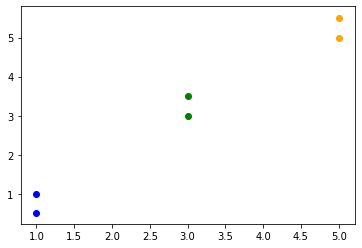

In [4]:
plt.scatter(trial[:2, 0], trial[:2, 1], color="blue")
plt.scatter(trial[2:4, 0], trial[2:4, 1], color="green")
plt.scatter(trial[4:, 0], trial[4:, 1], color="orange")
plt.show()

#### TRAIN

In [5]:
pca = Pca(trial)

eigen vectors
[[-0.75155925 -0.65966559]
 [ 0.65966559 -0.75155925]]
eigen values
[0.04017444 7.30149223]
explained variances
[0.00547211 0.99452789]
best component index
[1 0]


##### RESULT

In [6]:
oned = pca.getProjection(trial, 1)

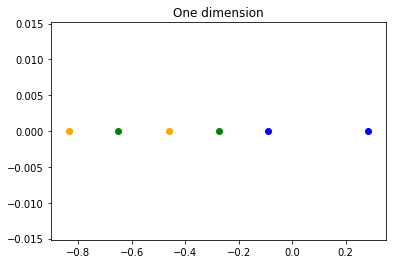

In [7]:
plt.scatter(oned[:2], [0] * 2, color="blue")
plt.scatter(oned[2:4], [0] * 2, color="green")
plt.scatter(oned[4:], [0] * 2, color="orange")
plt.title("One dimension")
plt.show()

In [8]:
twod = pca.getProjection(trial, 2)

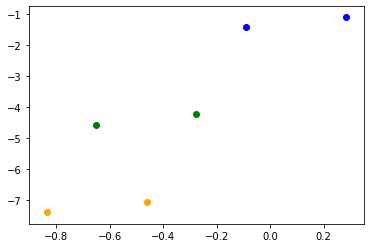

In [9]:
plt.scatter(twod[:2, 0], twod[:2, 1], color="blue")
plt.scatter(twod[2:4, 0], twod[2:4, 1], color="green")
plt.scatter(twod[4:, 0], twod[4:, 1], color="orange")
plt.show()

### MINST DIGITS

In [10]:
def get_dataset():
    
    (x_train, y_train), (x_test, y_test) = load_data()
    x_train = x_train.astype('float64') / 255.0
    x_test = x_test.astype('float64') / 255.0
    return x_train, x_test, y_train, y_test

x_train shape: (60000, 28, 28)
x_test shape: (10000, 28, 28)
Training examples


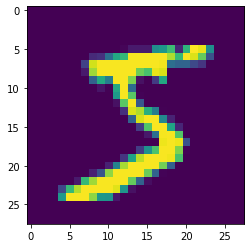

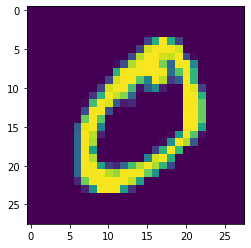

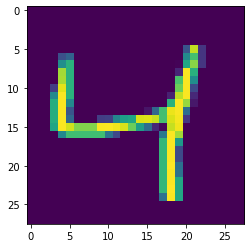

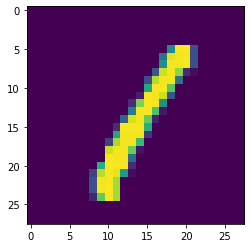

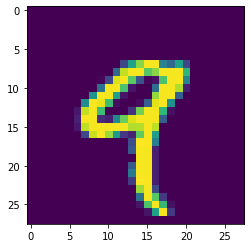

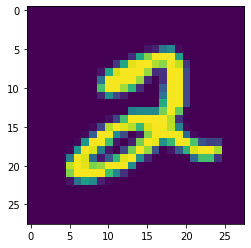

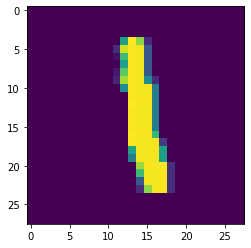

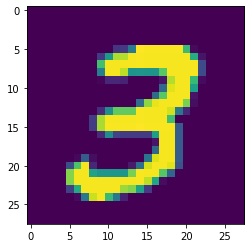

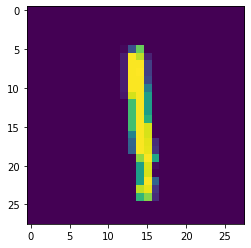

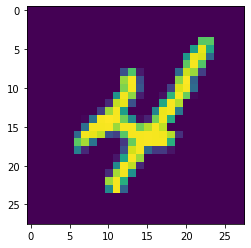

Test examples


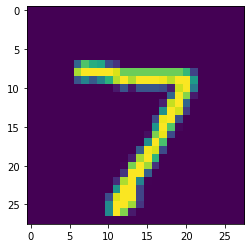

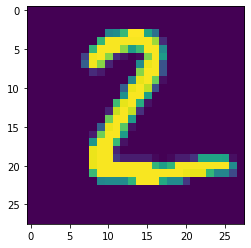

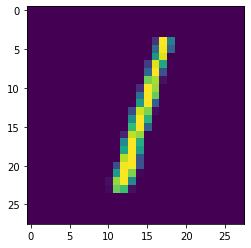

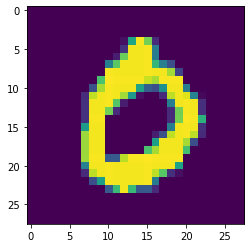

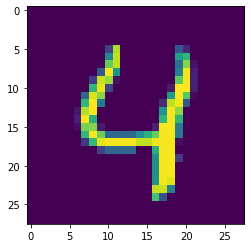

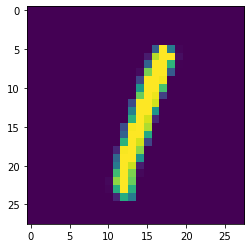

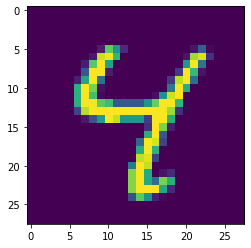

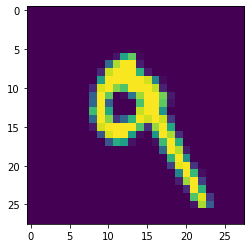

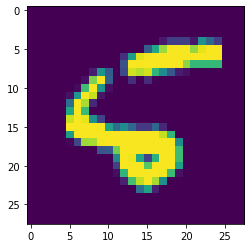

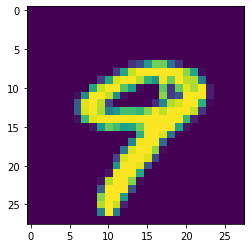

In [11]:
x_train, x_test, y_train, y_test = get_dataset()

print("x_train shape: " + str(x_train.shape))
print("x_test shape: " + str(x_test.shape))

print("Training examples")

for i in range(0, 10):
    
    plt.imshow(x_train[i])
    plt.show()
    
print("Test examples")    
    
for i in range(0, 10):
    
    plt.imshow(x_test[i])
    plt.show()

In [12]:
x_train = x_train.reshape(x_train.shape[0], 784)
x_test = x_test.reshape(x_test.shape[0], 784)
print("x_train shape: " + str(x_train.shape))
print("x_test shape: " + str(x_test.shape))

x_train shape: (60000, 784)
x_test shape: (10000, 784)


#### TRAIN

In [13]:
pca = Pca(x_train)

eigen vectors
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
eigen values
[ 5.11687301e+00  3.74139084e+00  3.25270845e+00  2.84162070e+00
  2.56711774e+00  2.27366339e+00  1.72515498e+00  1.52056024e+00
  1.45630525e+00  1.24275009e+00  1.11208951e+00  1.06664054e+00
  9.04680833e-01  8.92181223e-01  8.32353048e-01  7.81900323e-01
  6.98386871e-01  6.73255811e-01  6.25995240e-01  6.07763020e-01
  5.62145880e-01  5.30798829e-01  5.02780255e-01  4.81147033e-01
  4.65783200e-01  4.42538691e-01  4.28439606e-01  4.14618707e-01
  3.92667337e-01  3.64261791e-01  3.46985958e-01  3.41741890e-01
  3.17734284e-01  3.09280821e-01  3.00549034e-01  2.86632712e-01
  2.66680512e-01  2.57227909e-01  2.53838022e-01  2.49006738e-01
  2.40823990e-01  2.34543854e-01  2.20658652e-01  2.09962678e-01
  2.02981381e-01  1.97776690e-01  1.90872477e-01  1.85379715e-01
  1.79298798e-01  1.69711256e-01  1.6

##### 1 dimensions

classe: 0


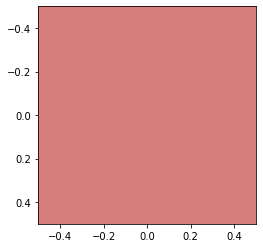

classe: 1


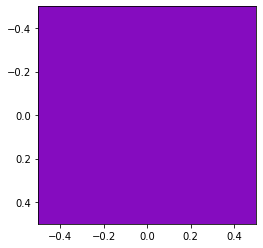

classe: 2


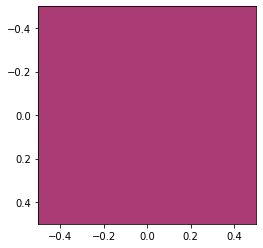

classe: 3


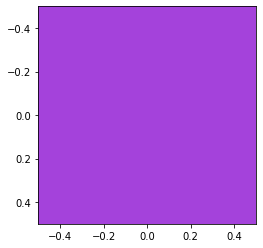

classe: 4


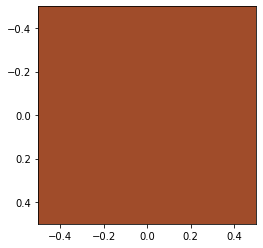

classe: 5


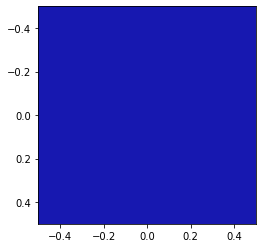

classe: 6


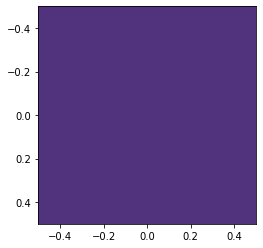

classe: 7


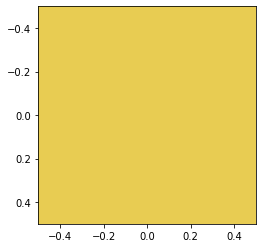

classe: 8


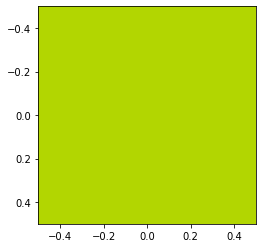

classe: 9


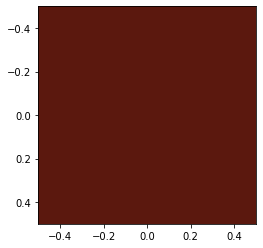

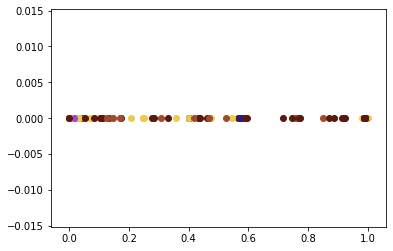

In [14]:
classes = np.unique(y_test)
colors = np.random.randint(255, size=(classes.shape[0], 3)) / 255.0

for i in range(colors.shape[0]):
    print("classe: " + str(classes[i]))
    plt.imshow((colors[i] * 255).reshape((1, 1, 3)).astype(int))
    plt.show()

for i in range(x_test[:1000].shape[0]):

    plt.scatter(pca.getProjection(x_test[i], 1), [0], color=colors[y_test[i]])

plt.show()

##### 2 dimensions

classe: 0


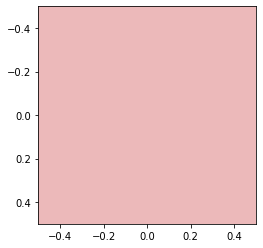

classe: 1


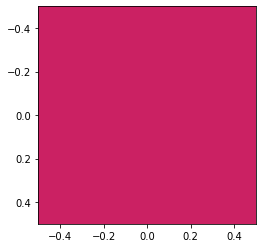

classe: 2


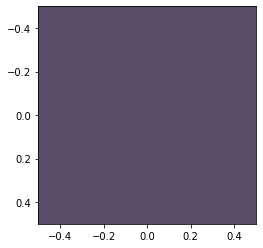

classe: 3


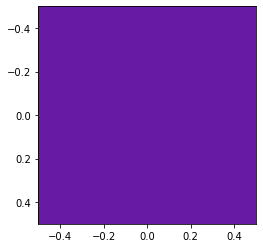

classe: 4


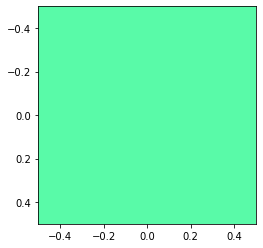

classe: 5


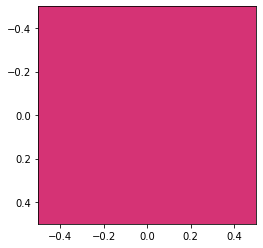

classe: 6


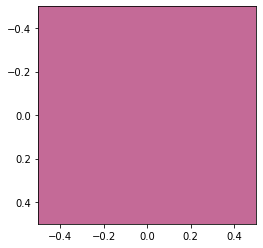

classe: 7


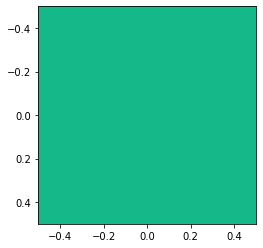

classe: 8


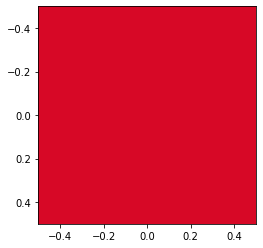

classe: 9


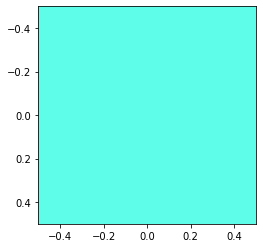

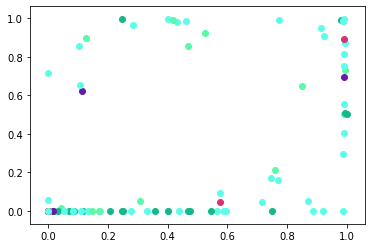

In [15]:
classes = np.unique(y_train)
colors = np.random.randint(255, size=(classes.shape[0], 3)) / 255.0

for i in range(colors.shape[0]):
    print("classe: " + str(classes[i]))
    plt.imshow((colors[i] * 255).reshape((1, 1, 3)).astype(int))
    plt.show()

for i in range(x_test[:1000].shape[0]):
    
    proj = pca.getProjection(x_test[i], 2)
    plt.scatter(proj[0], proj[1], color=colors[y_test[i]])

plt.show()

#### RECONSTRUCTION

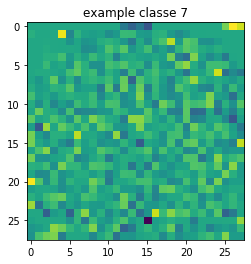

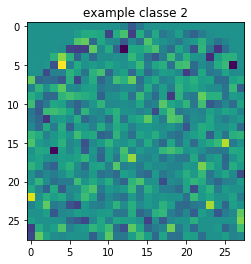

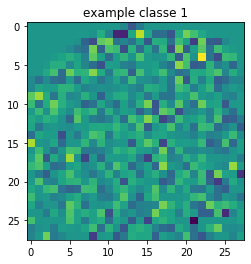

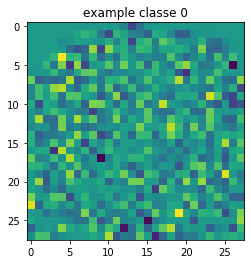

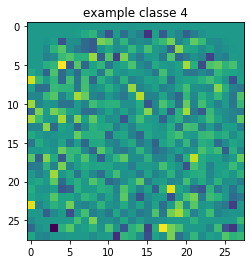

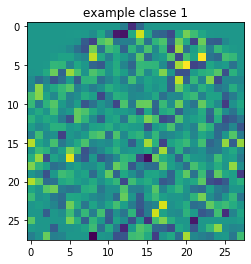

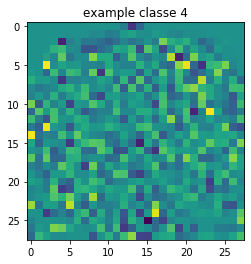

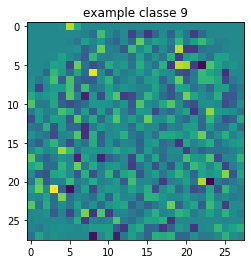

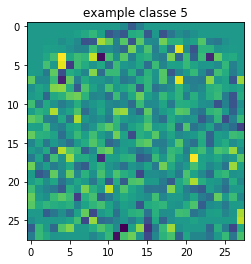

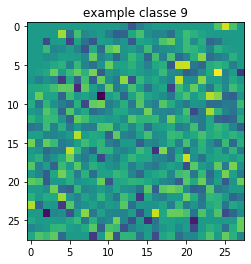

In [16]:
examples = pca.getProjection(x_test[:10], 784)

i = 0

while i < 10:

    plt.title("example classe " + str(y_test[i]))
    plt.imshow(examples[i].reshape((28, 28)).astype("float64"))
    plt.show()
    i += 1

### FRUITS 360

#### DATA

In [17]:
def get_dataset(gray=False, size=None):
    
    train_path = "../data/fruits-360/Training/"
    test_path = "../data/fruits-360/Test/"
    x_train, x_test, y_train, y_test = [], [], [], []
    
    classe = 0
    
    for filename in os.listdir(train_path):
        
        for fruit_file in os.listdir(train_path + filename):
            
            image = cv2.imread(train_path + filename + '/' + fruit_file)
            
            if gray:
                image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            
            if size is not None:
                image = cv2.resize(image, size)
            
            x_train.append(image)
            y_train.append(classe)
        
        classe += 1
    
    classe = 0
            
    for filename in os.listdir(test_path):
        
        for fruit_file in os.listdir(test_path + filename):
            
            image = cv2.imread(test_path + filename + '/' + fruit_file)
            
            if gray:
                image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
                
            if size is not None:
                image = cv2.resize(image, size)
            
            x_test.append(image)
            y_test.append(classe)
        
        classe += 1
    
    
    x_train = np.array(x_train)
    x_test = np.array(x_test)
    y_train = np.array(y_train)
    y_test = np.array(y_test)
    
    return x_train, x_test, y_train, y_test

x_train shape: (67692, 28, 28, 3)
x_test shape: (22688, 28, 28, 3)
Training examples


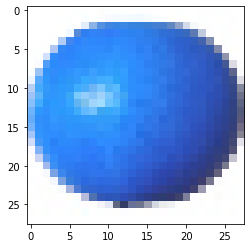

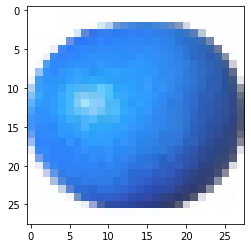

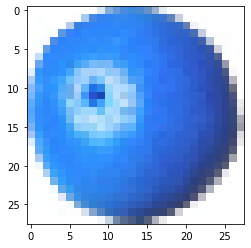

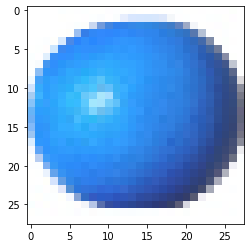

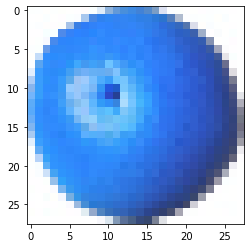

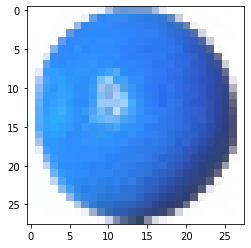

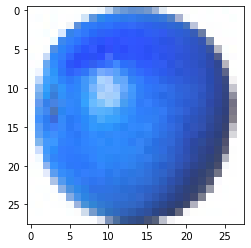

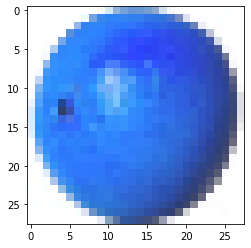

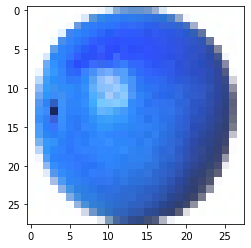

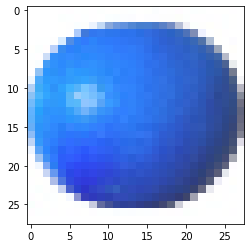

Test examples


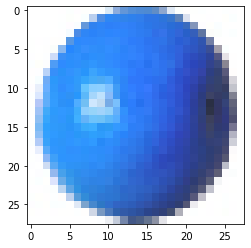

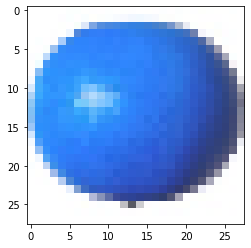

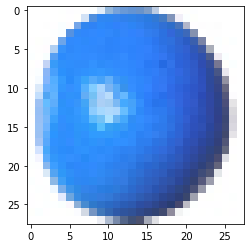

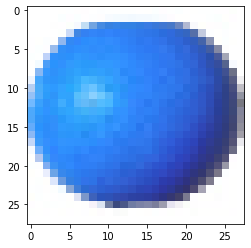

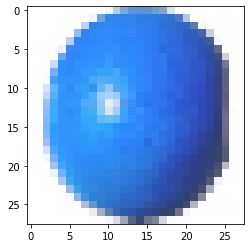

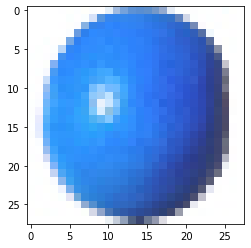

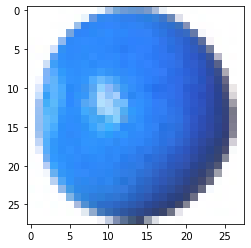

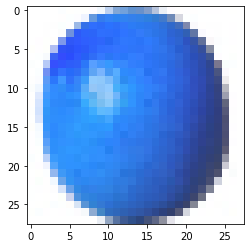

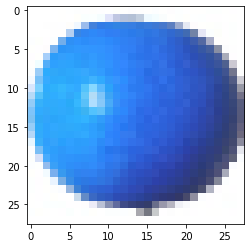

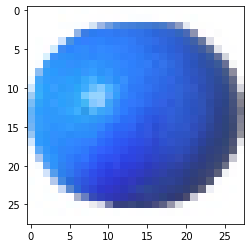

In [18]:
x_train, x_test, y_train, y_test = get_dataset(False, (28, 28))

print("x_train shape: " + str(x_train.shape))
print("x_test shape: " + str(x_test.shape))

print("Training examples")

for i in range(0, 10):
    
    plt.imshow(x_train[i])
    plt.show()
    
print("Test examples")    
    
for i in range(0, 10):
    
    plt.imshow(x_test[i])
    plt.show()

In [19]:
x_train = x_train.reshape(x_train.shape[0], 2352)
x_test = x_test.reshape(x_test.shape[0], 2352)
print("x_train shape: " + str(x_train.shape))
print("x_test shape: " + str(x_test.shape))

x_train shape: (67692, 2352)
x_test shape: (22688, 2352)


#### TRAIN

In [20]:
pca = Pca(x_train)

eigen vectors
[[-5.95249517e-05  1.45895376e-04  4.23886998e-05 ... -3.07672809e-03
   8.05597764e-03  5.54078582e-03]
 [-2.32625539e-05  4.52166154e-05  1.59441405e-05 ... -2.74908260e-03
   3.81161559e-03  2.73107572e-03]
 [-5.51881638e-05  9.72146930e-05  3.34673466e-05 ... -4.51096431e-03
   8.51523255e-04  4.08539995e-03]
 ...
 [-5.82878369e-07  4.27812869e-07  1.55934598e-07 ... -7.71776224e-04
   8.26341786e-04  1.35817085e-04]
 [-6.21201081e-07  4.70394099e-07  1.72366429e-07 ... -8.09534718e-04
   8.92997275e-04  1.85744721e-04]
 [-6.32911637e-07  4.75834274e-07  1.76075349e-07 ... -8.05214522e-04
   9.31233312e-04  2.01896984e-04]]
eigen values
[2.95464842e+06 1.21241815e+06 1.03948349e+06 ... 2.84316605e+00
 2.80547085e+00 2.84971475e+00]
explained variances
[3.04928451e-01 1.25125137e-01 1.07277769e-01 ... 2.93423141e-07
 2.89532885e-07 2.94098986e-07]
best component index
[   0    1    2 ... 1627 1621 1622]


##### 1 dimensions

classe: 0


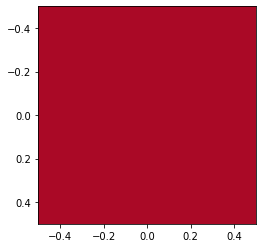

classe: 1


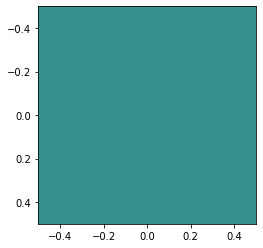

classe: 2


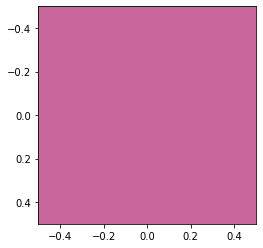

classe: 3


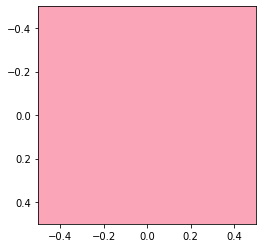

classe: 4


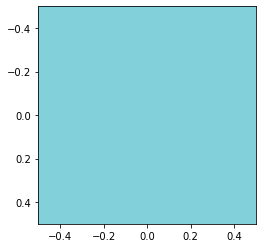

classe: 5


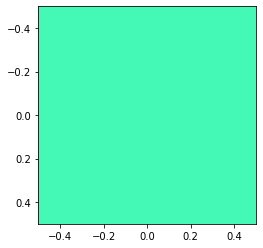

classe: 6


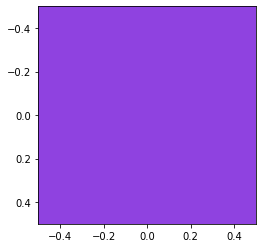

classe: 7


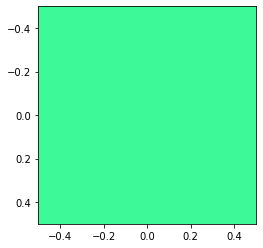

classe: 8


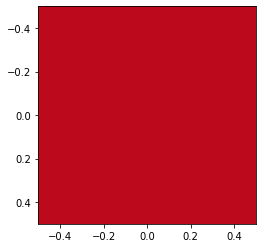

classe: 9


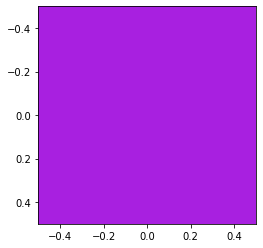

classe: 10


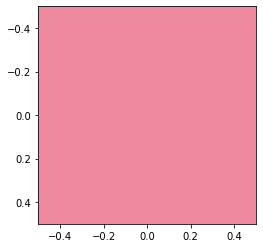

classe: 11


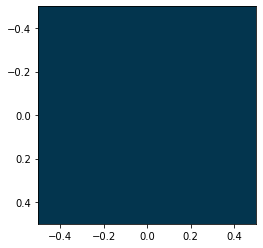

classe: 12


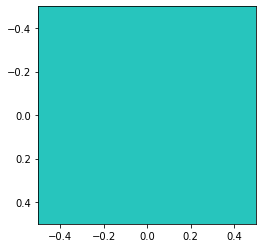

classe: 13


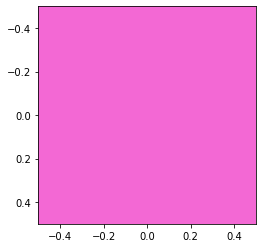

classe: 14


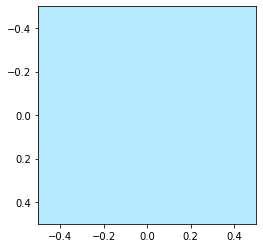

classe: 15


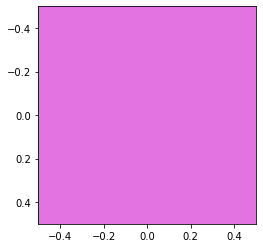

classe: 16


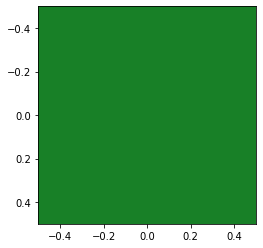

classe: 17


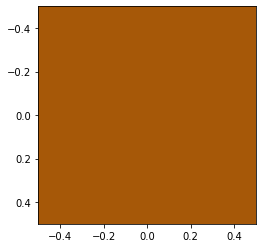

classe: 18


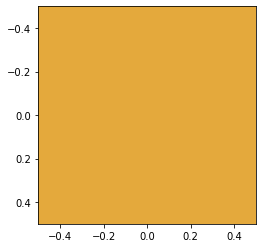

classe: 19


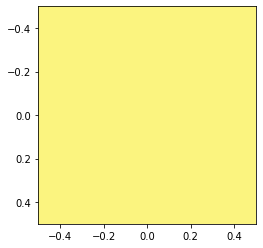

classe: 20


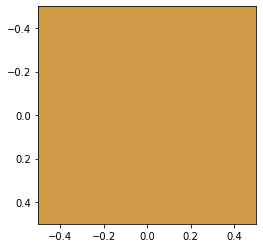

classe: 21


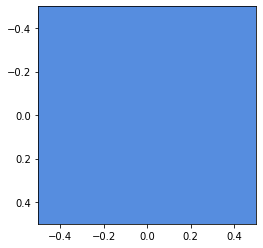

classe: 22


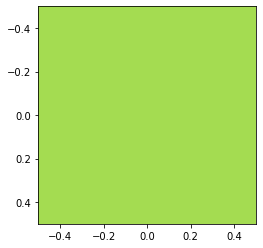

classe: 23


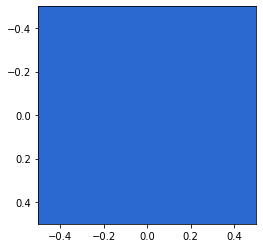

classe: 24


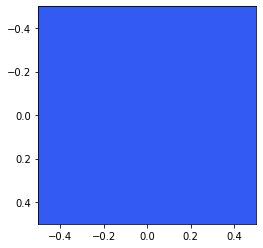

classe: 25


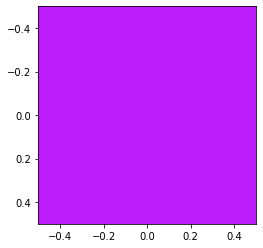

classe: 26


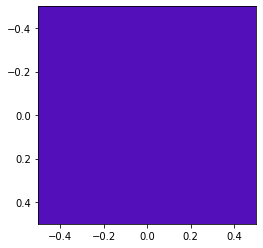

classe: 27


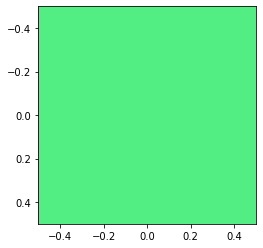

classe: 28


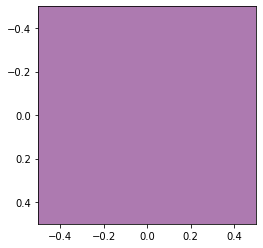

classe: 29


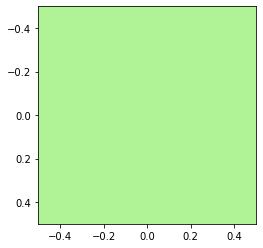

classe: 30


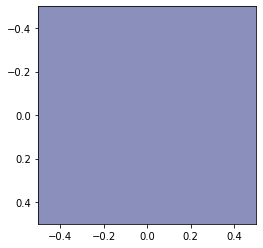

classe: 31


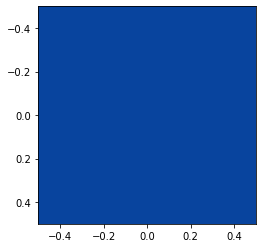

classe: 32


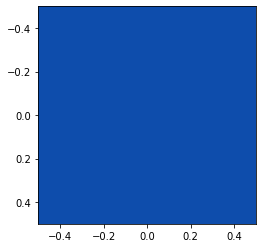

classe: 33


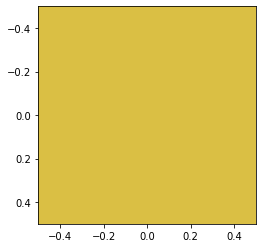

classe: 34


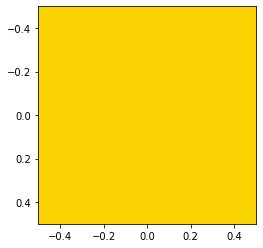

classe: 35


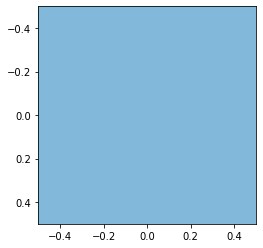

classe: 36


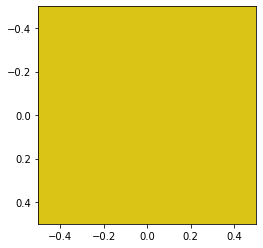

classe: 37


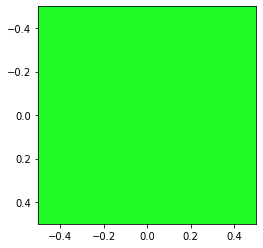

classe: 38


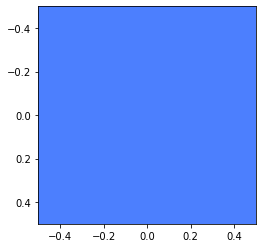

classe: 39


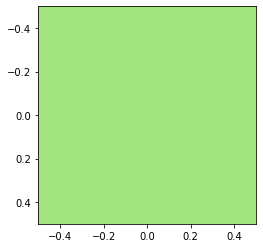

classe: 40


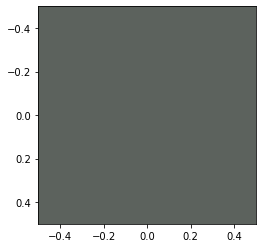

classe: 41


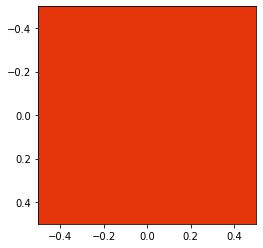

classe: 42


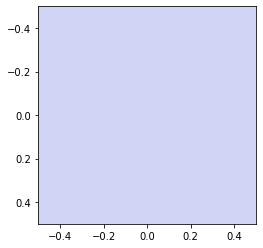

classe: 43


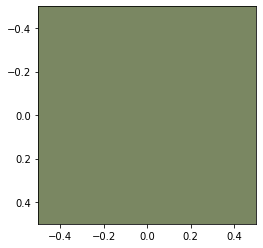

classe: 44


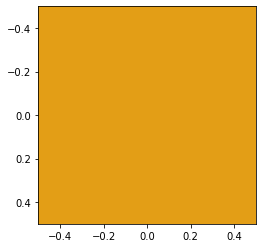

classe: 45


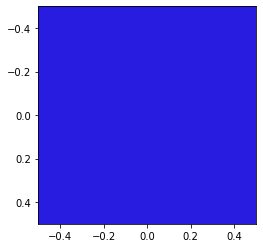

classe: 46


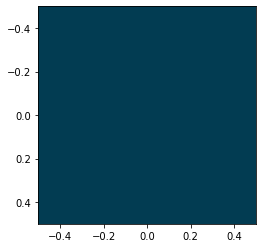

classe: 47


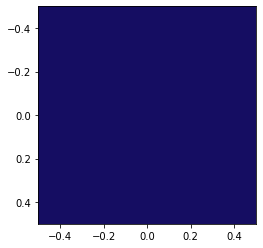

classe: 48


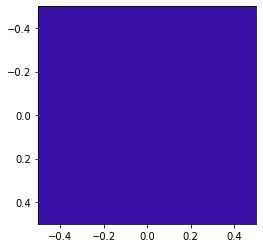

classe: 49


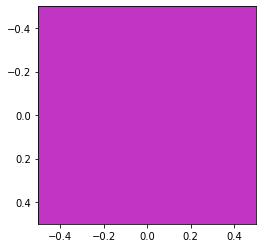

classe: 50


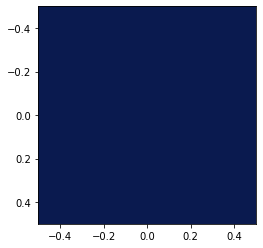

classe: 51


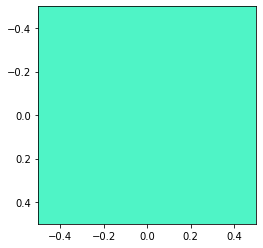

classe: 52


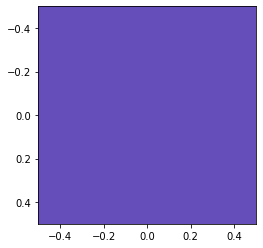

classe: 53


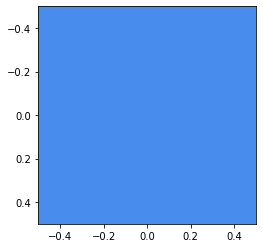

classe: 54


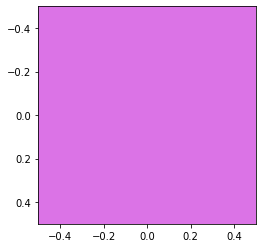

classe: 55


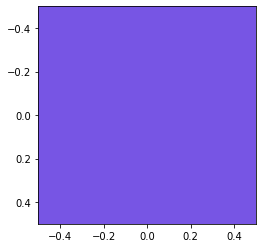

classe: 56


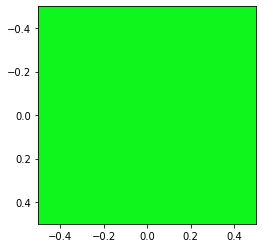

classe: 57


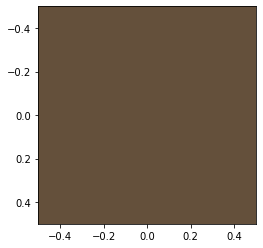

classe: 58


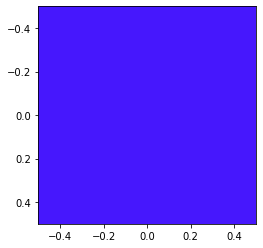

classe: 59


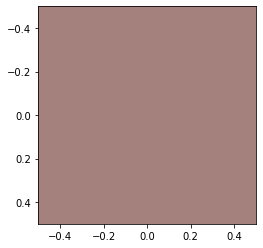

classe: 60


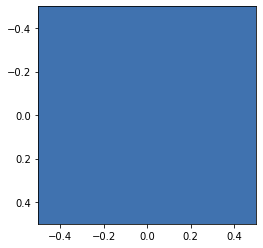

classe: 61


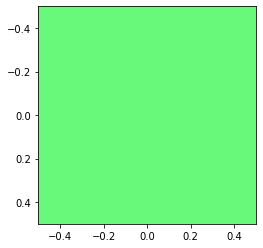

classe: 62


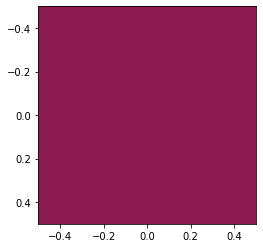

classe: 63


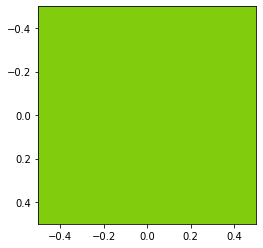

classe: 64


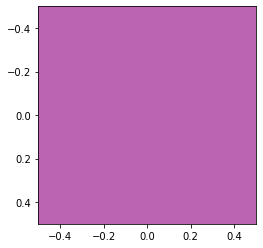

classe: 65


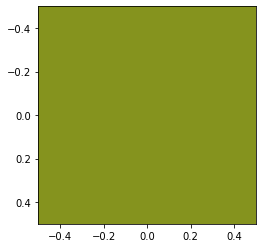

classe: 66


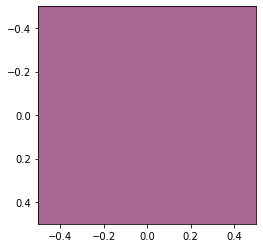

classe: 67


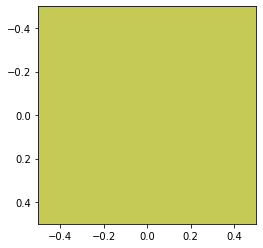

classe: 68


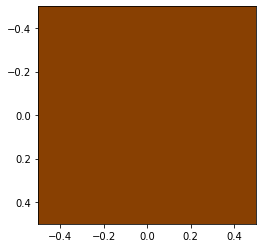

classe: 69


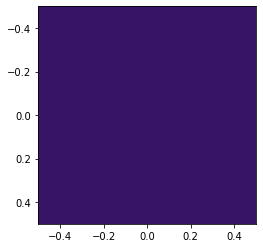

classe: 70


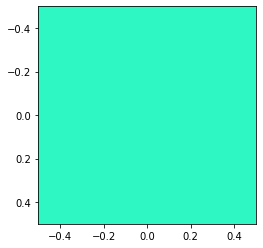

classe: 71


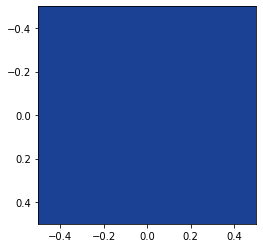

classe: 72


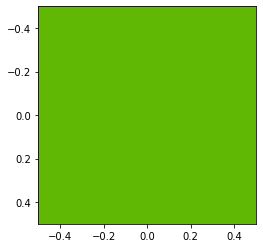

classe: 73


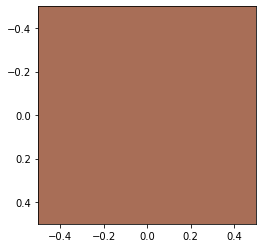

classe: 74


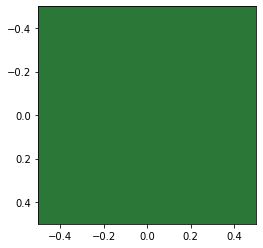

classe: 75


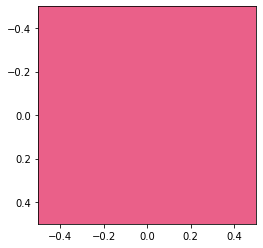

classe: 76


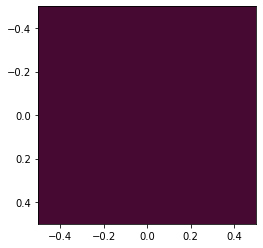

classe: 77


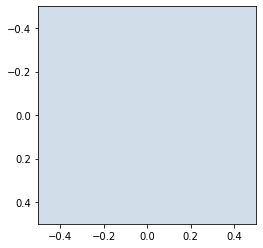

classe: 78


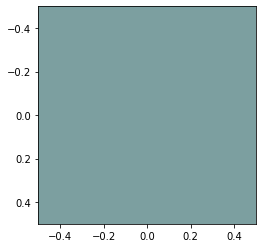

classe: 79


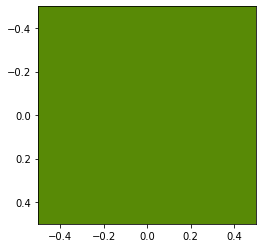

classe: 80


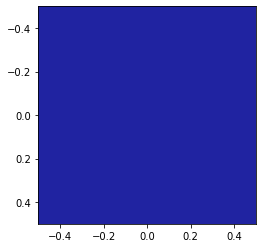

classe: 81


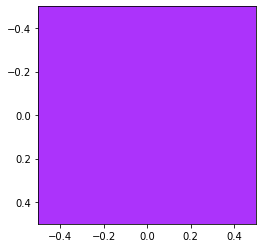

classe: 82


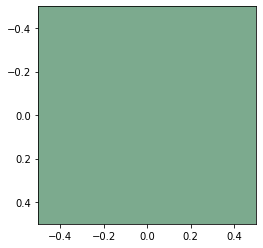

classe: 83


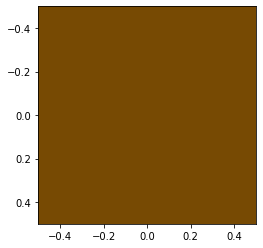

classe: 84


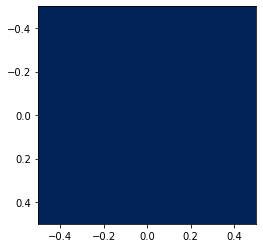

classe: 85


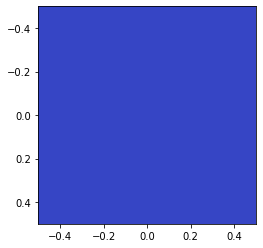

classe: 86


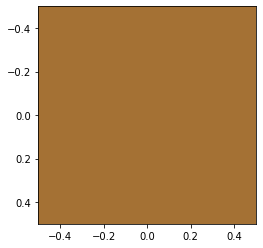

classe: 87


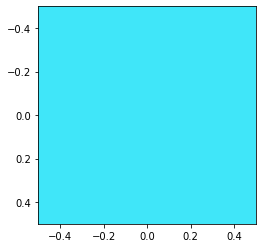

classe: 88


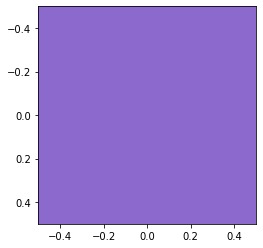

classe: 89


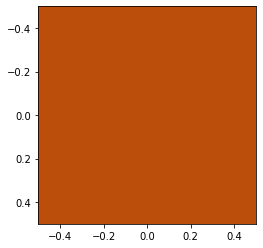

classe: 90


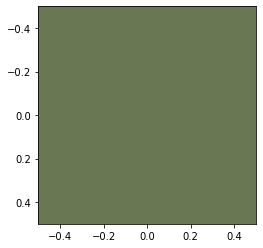

classe: 91


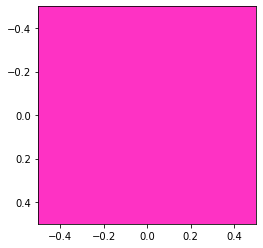

classe: 92


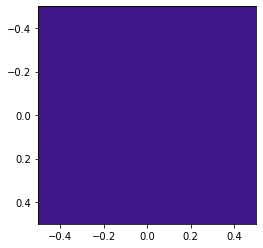

classe: 93


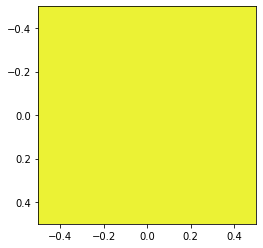

classe: 94


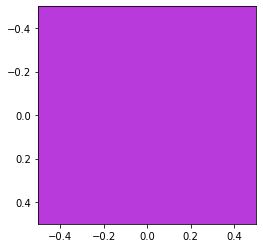

classe: 95


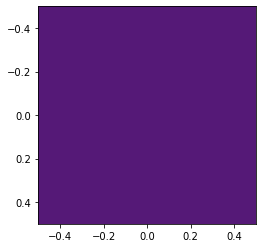

classe: 96


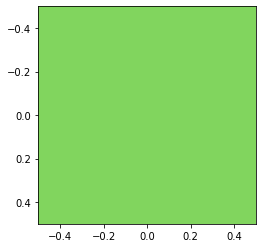

classe: 97


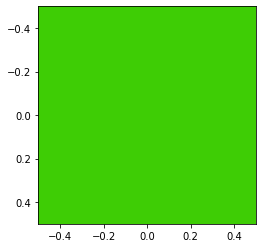

classe: 98


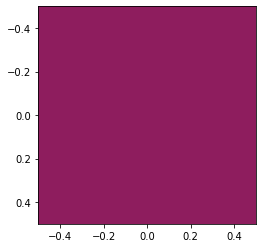

classe: 99


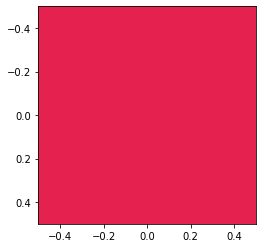

classe: 100


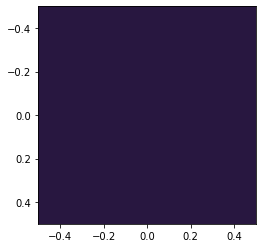

classe: 101


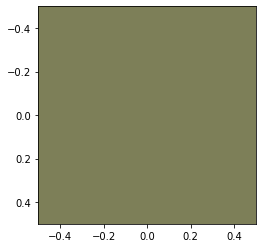

classe: 102


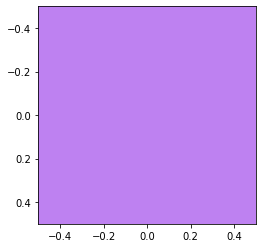

classe: 103


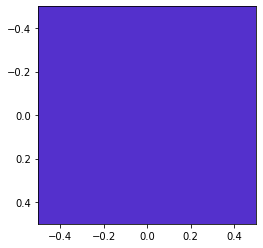

classe: 104


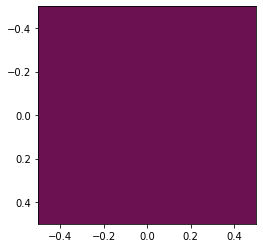

classe: 105


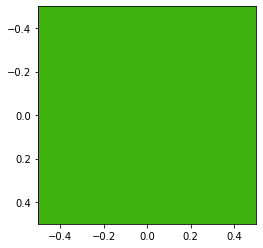

classe: 106


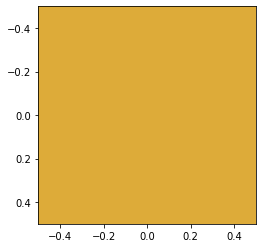

classe: 107


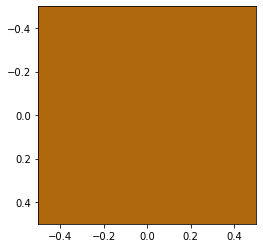

classe: 108


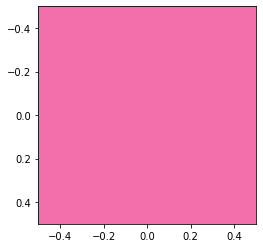

classe: 109


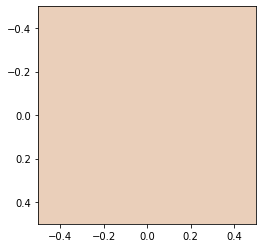

classe: 110


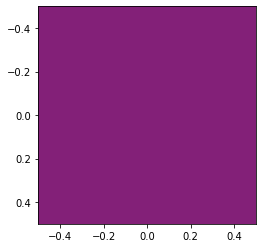

classe: 111


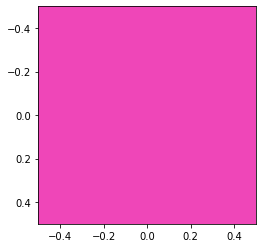

classe: 112


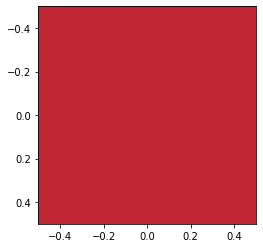

classe: 113


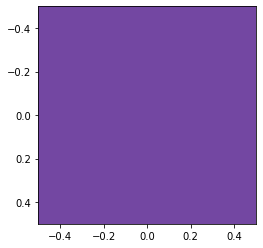

classe: 114


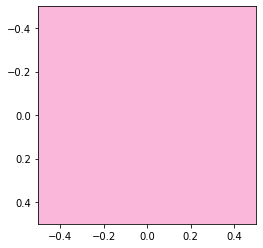

classe: 115


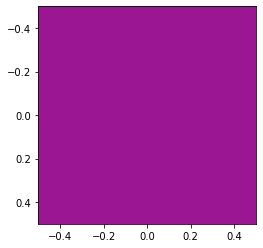

classe: 116


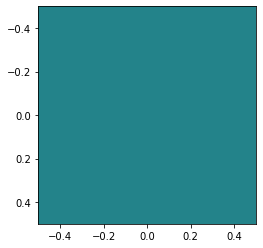

classe: 117


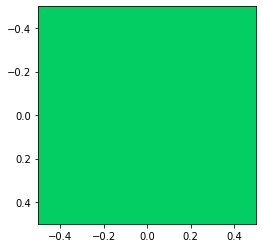

classe: 118


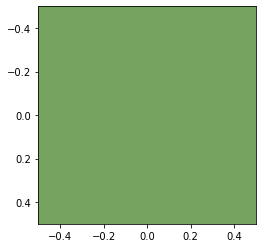

classe: 119


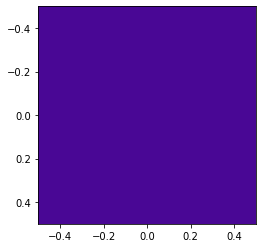

classe: 120


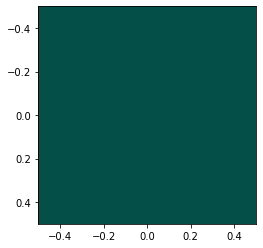

classe: 121


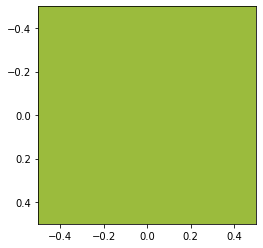

classe: 122


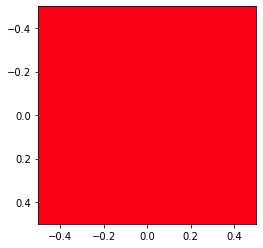

classe: 123


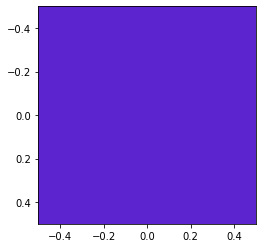

classe: 124


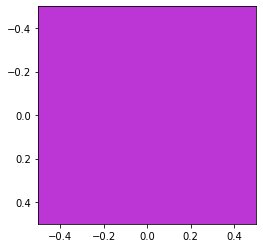

classe: 125


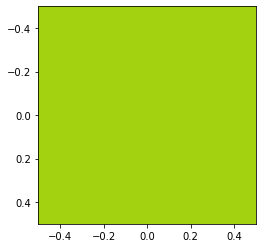

classe: 126


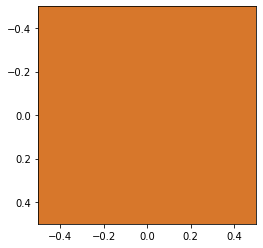

classe: 127


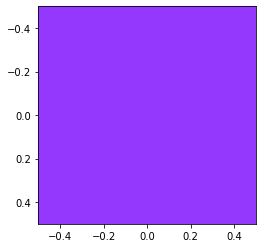

classe: 128


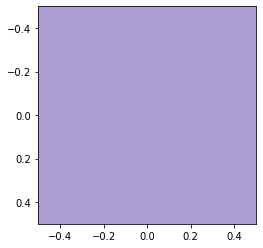

classe: 129


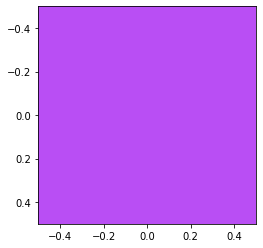

classe: 130


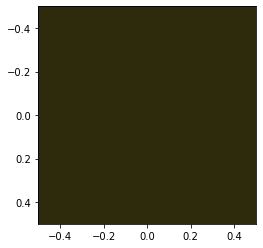

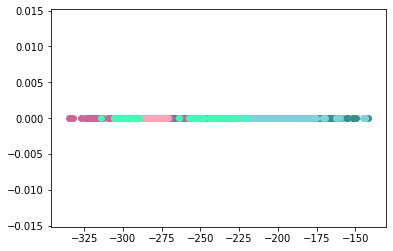

In [21]:
classes = np.unique(y_test)
colors = np.random.randint(255, size=(classes.shape[0], 3)) / 255.0

for i in range(colors.shape[0]):
    print("classe: " + str(classes[i]))
    plt.imshow((colors[i] * 255).reshape((1, 1, 3)).astype(int))
    plt.show()

for i in range(x_test[:1000].shape[0]):

    plt.scatter(pca.getProjection(x_test[i], 1), [0], color=colors[y_test[i]])

plt.show()

##### 2 dimensions

classe: 0


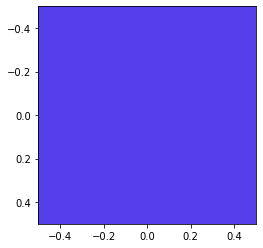

classe: 1


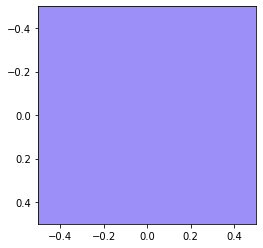

classe: 2


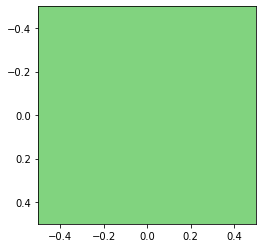

classe: 3


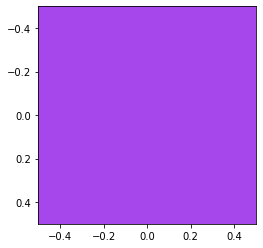

classe: 4


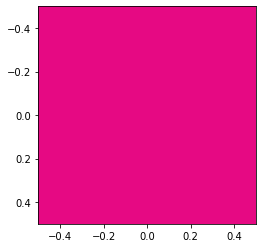

classe: 5


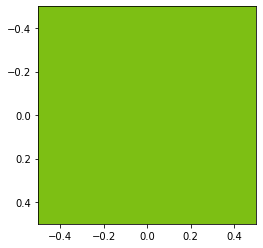

classe: 6


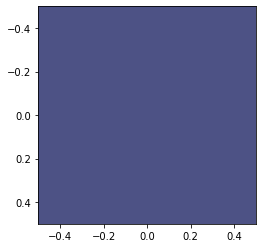

classe: 7


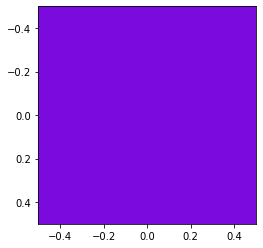

classe: 8


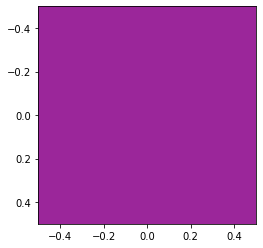

classe: 9


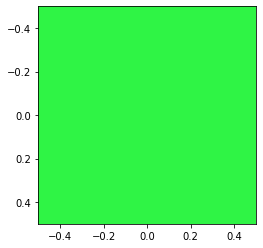

classe: 10


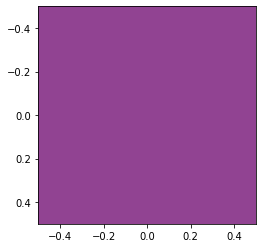

classe: 11


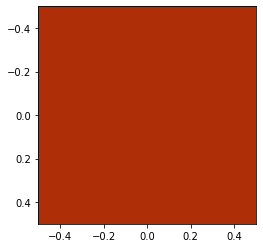

classe: 12


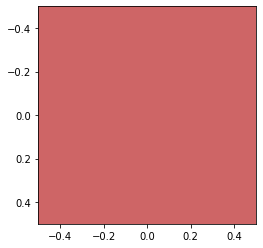

classe: 13


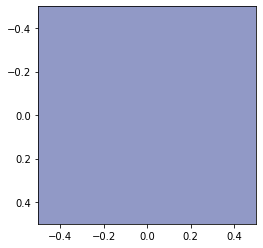

classe: 14


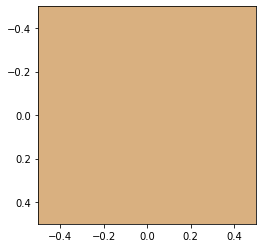

classe: 15


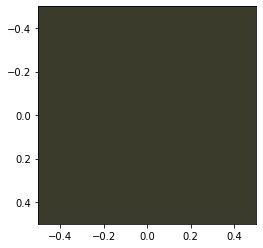

classe: 16


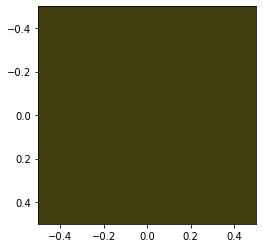

classe: 17


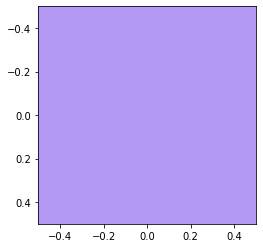

classe: 18


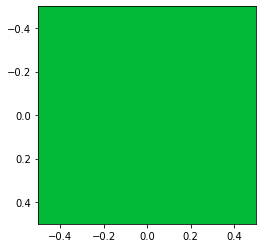

classe: 19


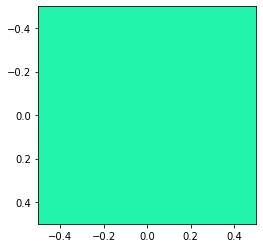

classe: 20


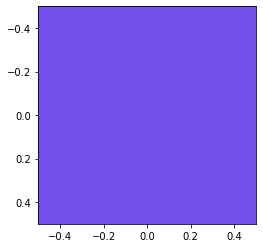

classe: 21


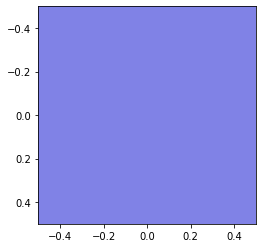

classe: 22


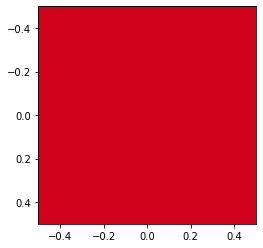

classe: 23


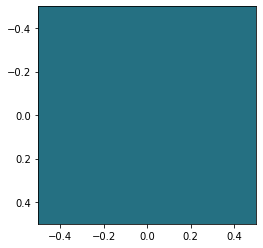

classe: 24


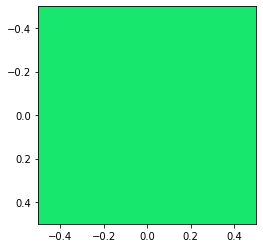

classe: 25


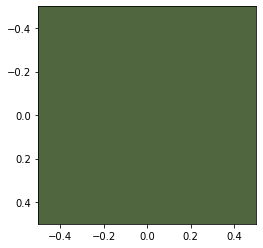

classe: 26


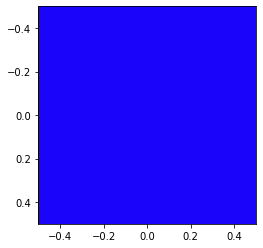

classe: 27


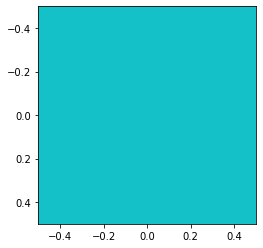

classe: 28


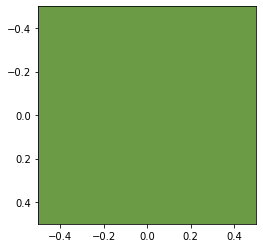

classe: 29


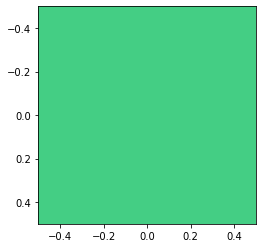

classe: 30


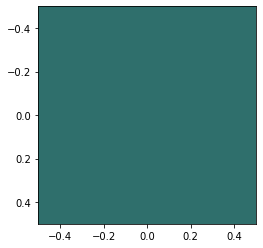

classe: 31


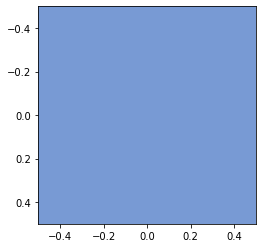

classe: 32


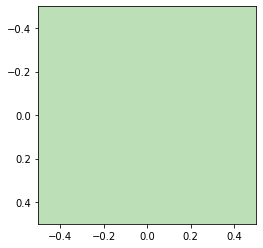

classe: 33


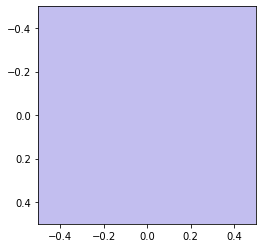

classe: 34


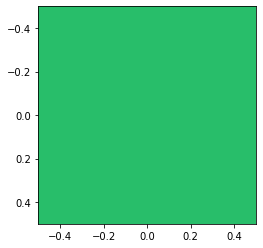

classe: 35


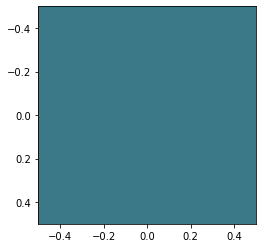

classe: 36


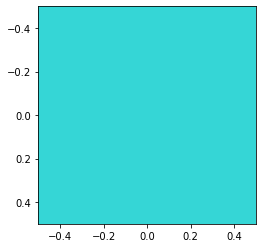

classe: 37


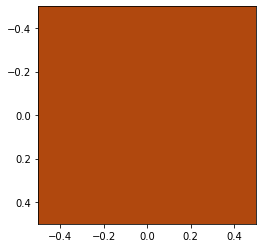

classe: 38


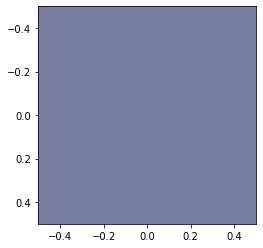

classe: 39


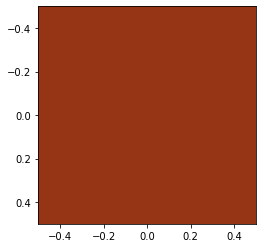

classe: 40


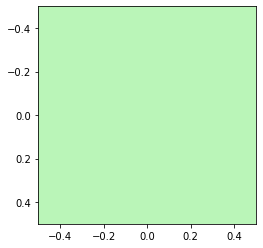

classe: 41


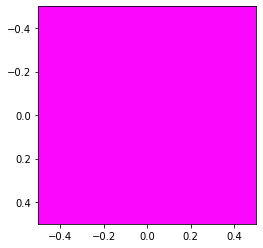

classe: 42


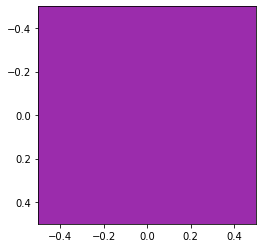

classe: 43


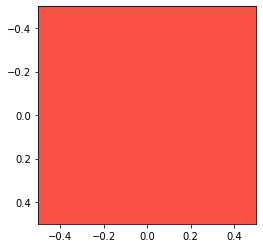

classe: 44


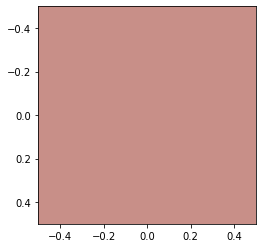

classe: 45


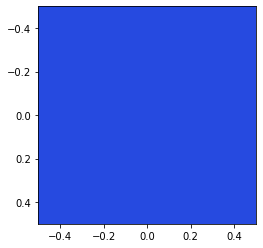

classe: 46


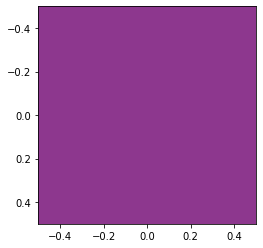

classe: 47


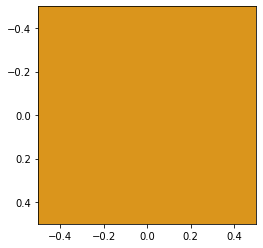

classe: 48


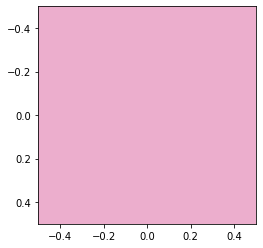

classe: 49


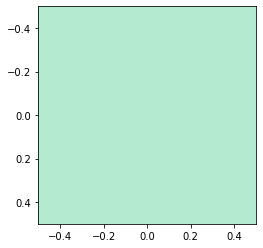

classe: 50


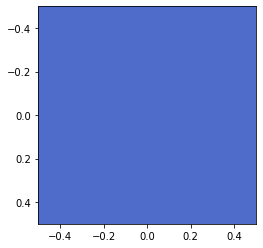

classe: 51


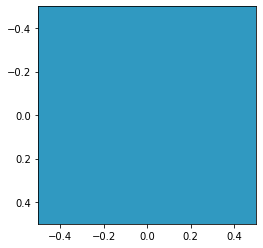

classe: 52


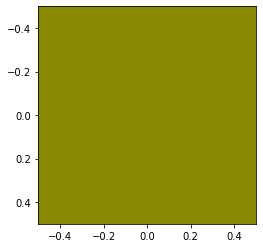

classe: 53


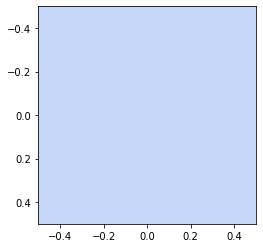

classe: 54


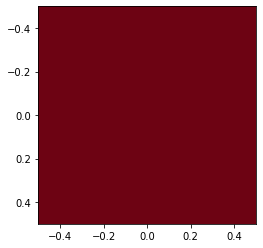

classe: 55


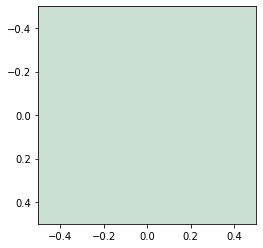

classe: 56


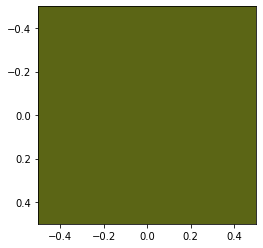

classe: 57


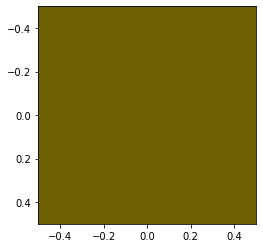

classe: 58


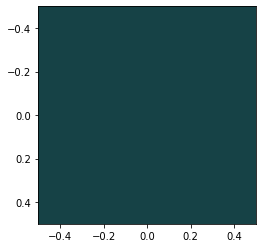

classe: 59


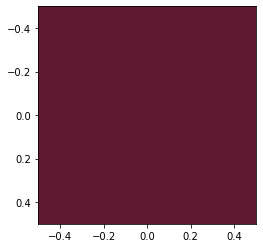

classe: 60


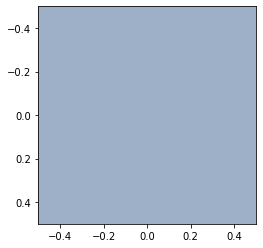

classe: 61


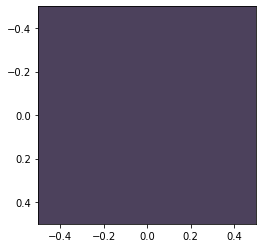

classe: 62


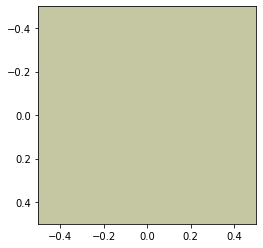

classe: 63


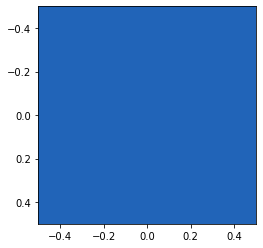

classe: 64


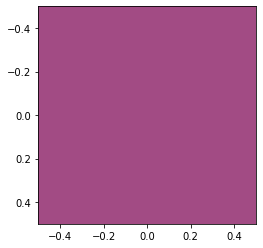

classe: 65


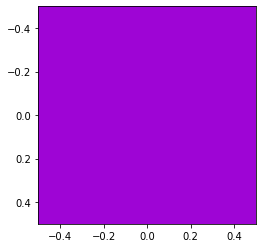

classe: 66


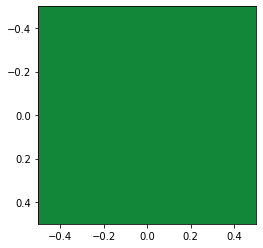

classe: 67


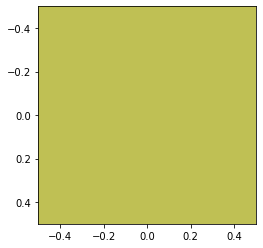

classe: 68


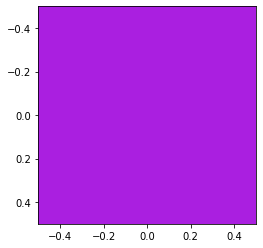

classe: 69


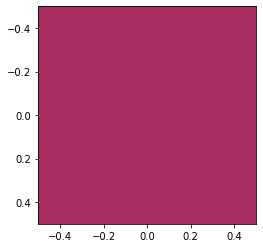

classe: 70


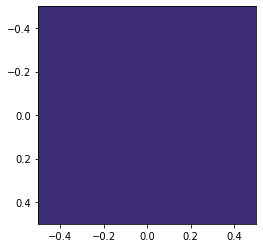

classe: 71


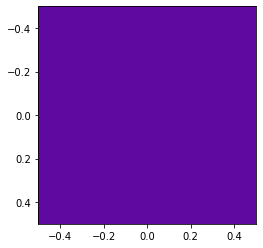

classe: 72


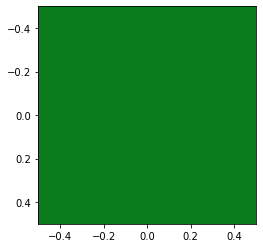

classe: 73


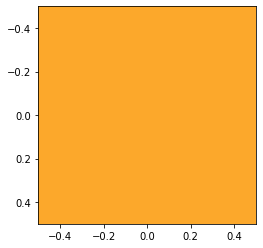

classe: 74


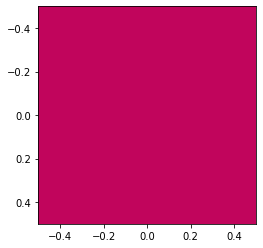

classe: 75


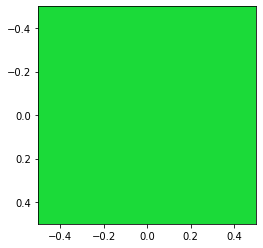

classe: 76


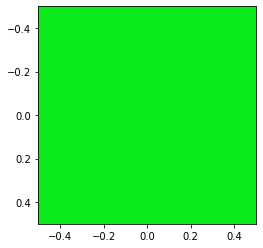

classe: 77


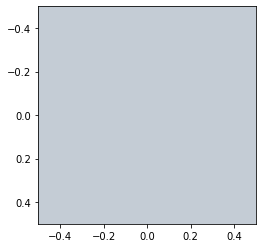

classe: 78


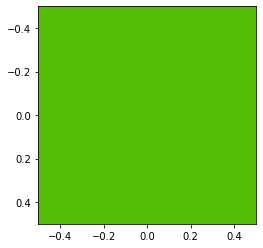

classe: 79


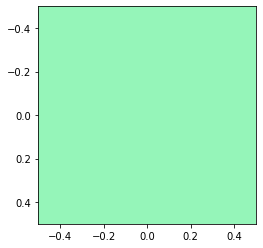

classe: 80


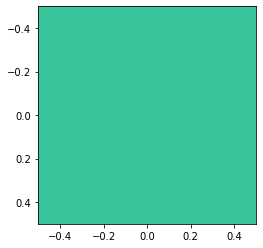

classe: 81


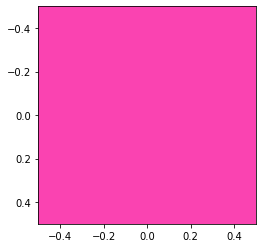

classe: 82


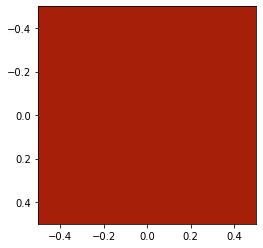

classe: 83


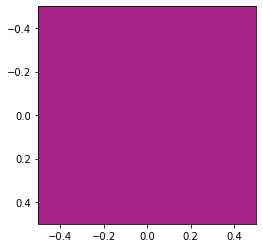

classe: 84


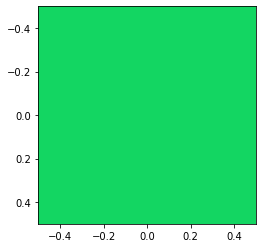

classe: 85


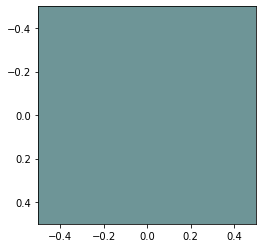

classe: 86


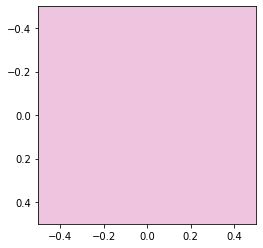

classe: 87


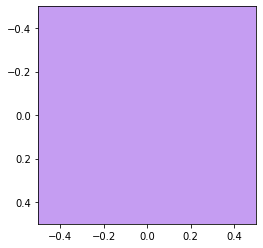

classe: 88


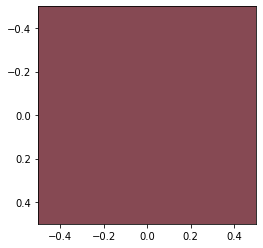

classe: 89


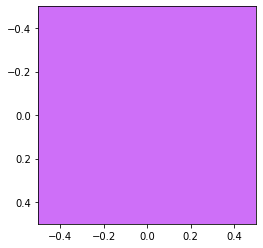

classe: 90


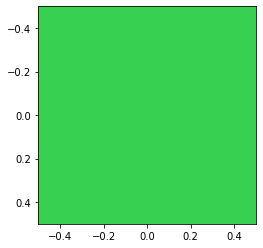

classe: 91


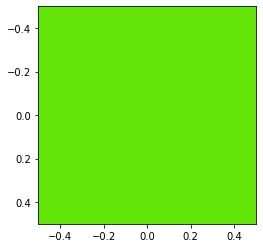

classe: 92


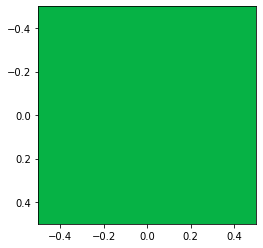

classe: 93


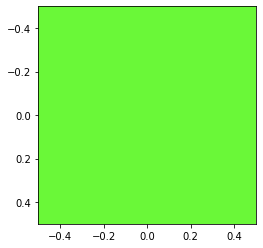

classe: 94


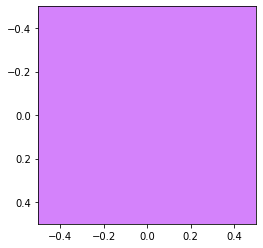

classe: 95


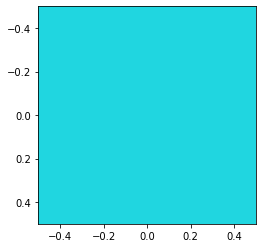

classe: 96


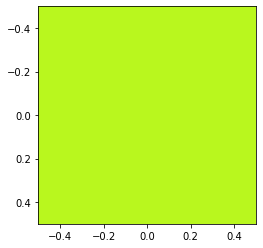

classe: 97


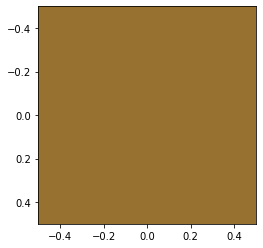

classe: 98


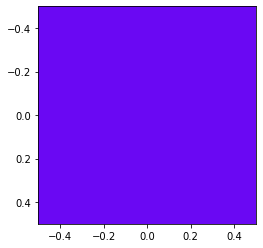

classe: 99


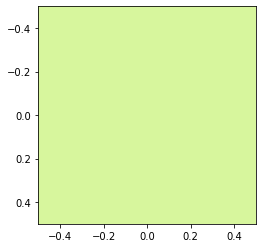

classe: 100


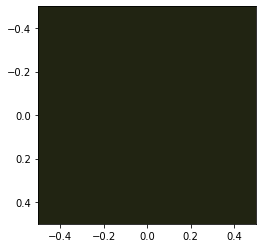

classe: 101


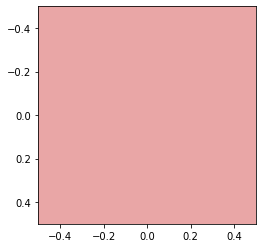

classe: 102


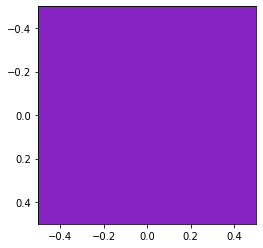

classe: 103


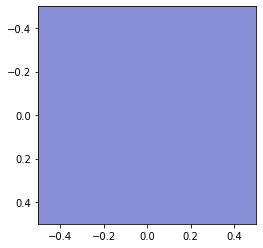

classe: 104


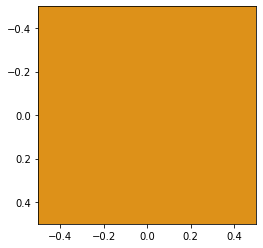

classe: 105


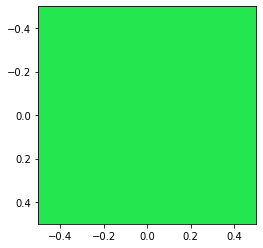

classe: 106


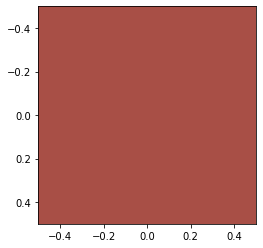

classe: 107


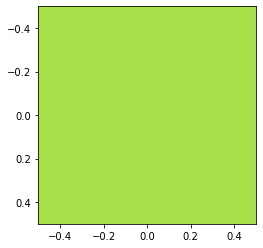

classe: 108


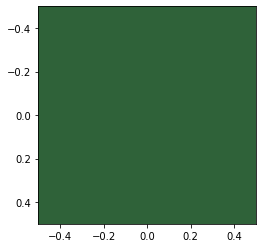

classe: 109


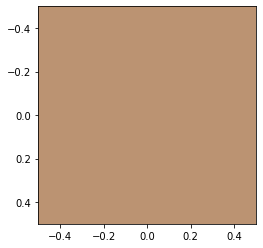

classe: 110


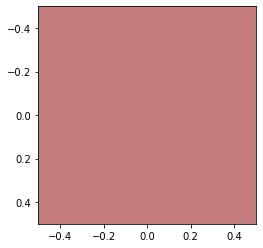

classe: 111


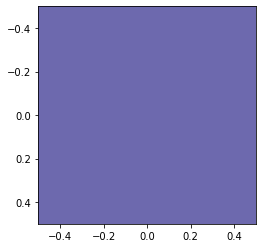

classe: 112


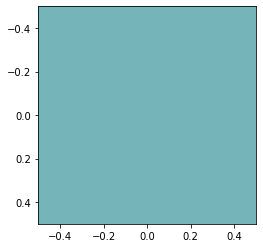

classe: 113


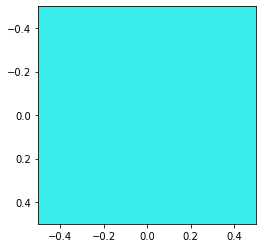

classe: 114


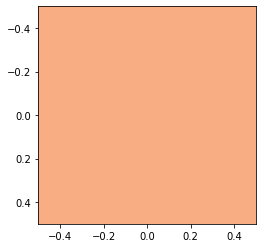

classe: 115


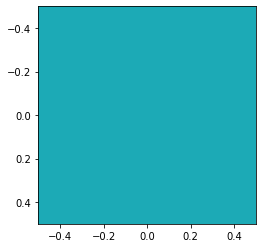

classe: 116


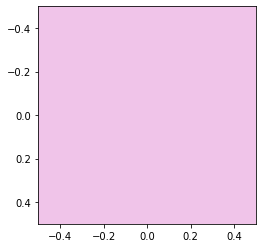

classe: 117


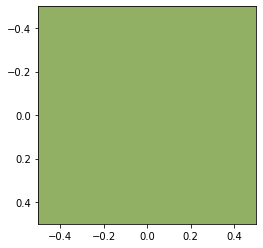

classe: 118


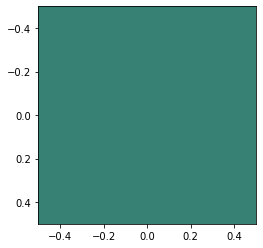

classe: 119


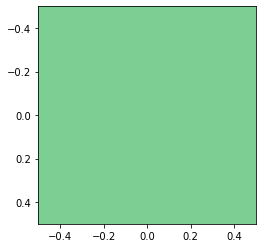

classe: 120


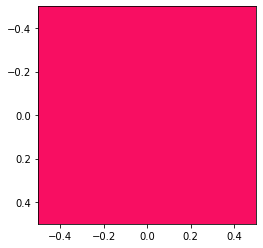

classe: 121


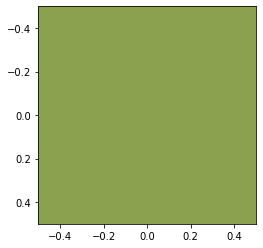

classe: 122


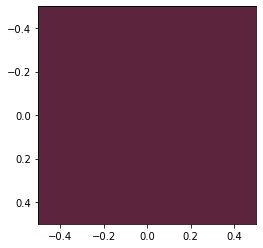

classe: 123


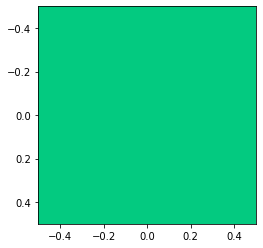

classe: 124


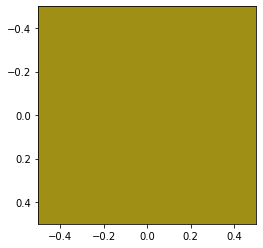

classe: 125


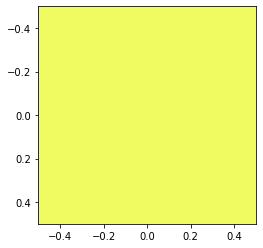

classe: 126


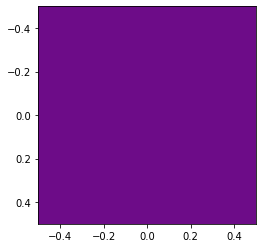

classe: 127


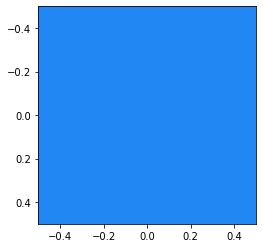

classe: 128


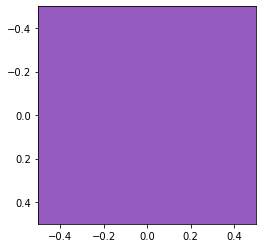

classe: 129


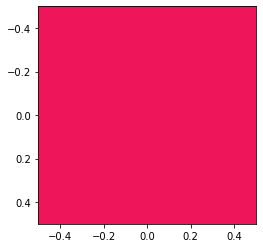

classe: 130


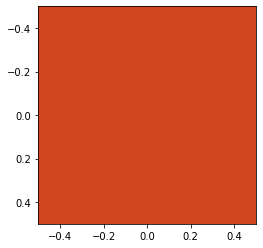

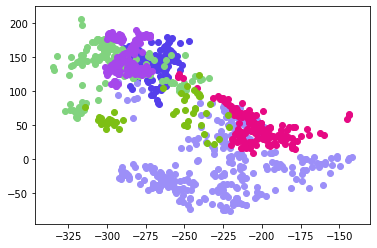

In [22]:
classes = np.unique(y_train)
colors = np.random.randint(255, size=(classes.shape[0], 3)) / 255.0

for i in range(colors.shape[0]):
    print("classe: " + str(classes[i]))
    plt.imshow((colors[i] * 255).reshape((1, 1, 3)).astype(int))
    plt.show()

for i in range(x_test[:1000].shape[0]):
    
    proj = pca.getProjection(x_test[i], 2)
    plt.scatter(proj[0], proj[1], color=colors[y_test[i]])

plt.show()

#### RECONSTRUCTION

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


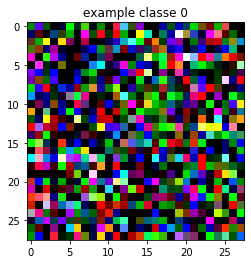

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


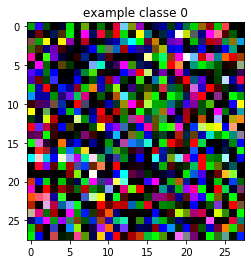

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


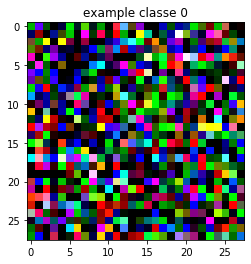

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


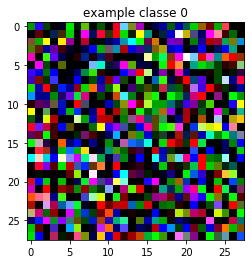

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


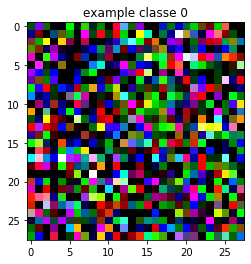

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


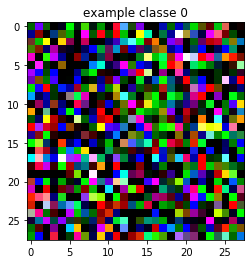

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


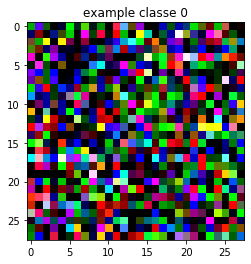

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


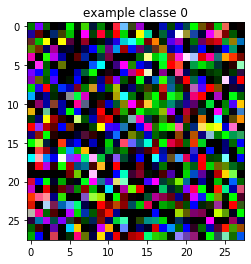

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


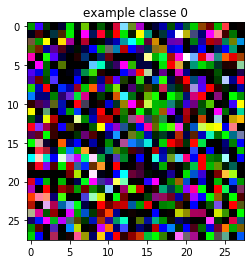

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


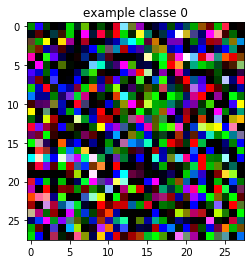

In [23]:
examples = pca.getProjection(x_test[:10], 2352)

i = 0

while i < 10:

    plt.title("example classe " + str(y_test[i]))
    plt.imshow(examples[i].reshape((28, 28, 3)).astype(int))
    plt.show()
    i += 1